In [5]:
#devtools::install_github("chenweng1991/redeemR")

In [ ]:
#library(devtools)
#install_local("/lab/solexa_weissman/cweng/Packages/redeemR")

In [1]:
library(redeemR)
library(stringr)
library(dplyr)
library(tidyr)
library(purrr)

Warning message:
“replacing previous import ‘ape::where’ by ‘dplyr::where’ when loading ‘redeemR’”
Warning message:
“replacing previous import ‘ape::keep.tip’ by ‘tidytree::keep.tip’ when loading ‘redeemR’”
Warning message:
“replacing previous import ‘ape::drop.tip’ by ‘tidytree::drop.tip’ when loading ‘redeemR’”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# Position bias analysis
Add new feature that generate raw fragment for passfilter variants with freq (# mol per cell) with distance
To examine the position biases

In [13]:
redeemv_final <- "/lab/solexa_weissman/cweng/Projects/MitoTracing_Velocity/SecondaryAnalysis/reproducibility_pub/data/redeemV_final"
sample="/Young1.T1.BMMC.Consensus.final/"

In [4]:
## read in redeemR raw data 
VariantsGTSummary<-redeemR.read(path=paste0(redeemv_final,sample),thr="S",Processed=T)

make redeemR object

In [5]:
redeemR<-Create_redeemR(VariantsGTSummary)

[1] "41114 variants to start"
[1] "40728 variants after remove low quality cells"
 [1] "Tag Homoplasmy: 11674_C_T" "Tag Homoplasmy: 11719_G_A"
 [3] "Tag Homoplasmy: 11947_A_G" "Tag Homoplasmy: 12414_T_C"
 [5] "Tag Homoplasmy: 1243_T_C"  "Tag Homoplasmy: 12705_C_T"
 [7] "Tag Homoplasmy: 12923_G_T" "Tag Homoplasmy: 1406_T_C" 
 [9] "Tag Homoplasmy: 1438_A_G"  "Tag Homoplasmy: 14766_C_T"
[11] "Tag Homoplasmy: 15326_A_G" "Tag Homoplasmy: 15884_G_C"
[13] "Tag Homoplasmy: 16223_C_T" "Tag Homoplasmy: 16292_C_T"
[15] "Tag Homoplasmy: 16519_T_C" "Tag Homoplasmy: 194_C_T"  
[17] "Tag Homoplasmy: 195_T_C"   "Tag Homoplasmy: 199_T_C"  
[19] "Tag Homoplasmy: 204_T_C"   "Tag Homoplasmy: 207_G_A"  
[21] "Tag Homoplasmy: 263_A_G"   "Tag Homoplasmy: 2706_A_G" 
[23] "Tag Homoplasmy: 3505_A_G"  "Tag Homoplasmy: 4769_A_G" 
[25] "Tag Homoplasmy: 5046_G_A"  "Tag Homoplasmy: 5460_G_A" 
[27] "Tag Homoplasmy: 7028_C_T"  "Tag Homoplasmy: 7058_T_C" 
[29] "Tag Homoplasmy: 709_G_A"   "Tag Homoplasmy: 73_A_G"   
[31

run the new function **add_raw_fragment**

In [6]:
## new function to produce the raw 
redeemR@raw.fragment.uniqV <- add_raw_fragment(redeemR)

Show the results

In [9]:
head(redeemR@raw.fragment.uniqV)

,UMI,start,end,pos,variant,length,rel_position,Freq,edge_dist
,<chr>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<int>,<dbl>
1,AAACAAGCAAACTAAC_11505_11683,11505,11683,11674,11674_C_T,178,0.9494382,33,9
2,AAACAAGCAAACTAAC_11529_11689,11529,11689,11674,11674_C_T,160,0.9062500,33,15
3,AAACAAGCAAACTAAC_11540_11691,11540,11691,11674,11674_C_T,151,0.8874172,33,17
4,AAACAAGCAAACTAAC_11564_11728,11564,11728,11674,11674_C_T,164,0.6707317,33,54
5,AAACAAGCAAACTAAC_11565_11863,11565,11863,11674,11674_C_T,298,0.3657718,33,109
6,AAACAAGCAAACTAAC_11683_11571,11571,11683,11674,11674_C_T,112,0.9196429,33,9


Check the heteroplasmy position biases

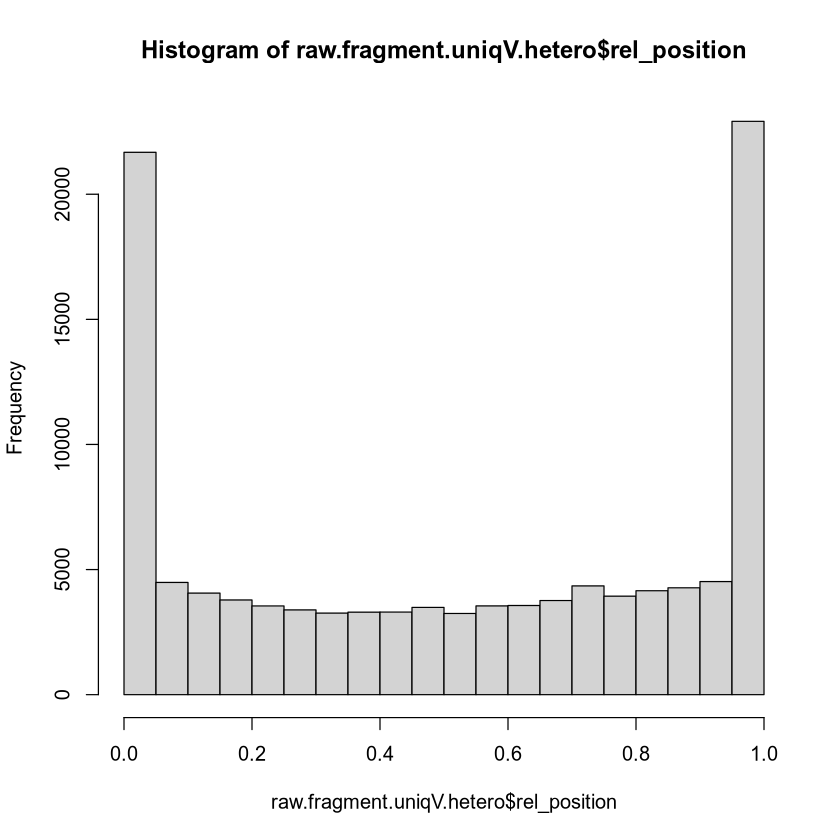

In [7]:
raw.fragment.uniqV.hetero<- subset(redeemR@raw.fragment.uniqV, !variant %in% redeemR@HomoVariants)
hist(raw.fragment.uniqV.hetero$rel_position)

Run new function **make_ks_test_df** that compute KS statstics for each variant based on redeemR@raw.fragment.uniqV

In [2]:
make_ks_test_df

function (redeemR) 
{
    print("Make sure redeemR@raw.fragment.uniqV exist, produced by redeemR@raw.fragment.uniqV <- add_raw_fragment(redeemR)")
    redeemR@raw.fragment.uniqV %>% nest(data = c(-variant)) %>% 
        mutate(D_stat = purrr::map(data, ~(ks.test(.x$rel_position, 
            "punif", 0, 1))), tidied = purrr::map(D_stat, broom::tidy)) %>% 
        mutate(n = map_dbl(data, nrow)) %>% tidyr::unnest(tidied) %>% 
        dplyr::select(variant, statistic, p.value, n)
}
<bytecode: 0x55c573da0db0>
<environment: namespace:redeemR>

Run add_raw_fragment(redeemR) if not run previously

In [ ]:
## new function to produce the raw 
#redeemR@raw.fragment.uniqV <- add_raw_fragment(redeemR) 
# Updated 2024-8-8, directly assign and return the redeem object
redeemR<- add_raw_fragment(redeemR)

In [9]:
ks.results<- make_ks_test_df(redeemR)

[1] "Make sure redeemR@raw.fragment.uniqV exist, produced by redeemR@raw.fragment.uniqV <- add_raw_fragment(redeemR)"


Warning message:
“There were 1549 warnings in `mutate()`.
The first warning was:
ℹ In argument: `D_stat = purrr::map(data, ~(ks.test(.x$rel_position, "punif",
  0, 1)))`.
Caused by warning in `ks.test.default()`:
! ties should not be present for the Kolmogorov-Smirnov test
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1548 remaining warnings.”


update adding positivecount_mean

It should be there by default now,  with the new colum of PositiveMean_cts

In [9]:
redeemR<-Create_redeemR(VariantsGTSummary)

[1] "41114 variants to start"
[1] "40728 variants after remove low quality cells"
 [1] "Tag Homoplasmy: 11674_C_T" "Tag Homoplasmy: 11719_G_A"
 [3] "Tag Homoplasmy: 11947_A_G" "Tag Homoplasmy: 12414_T_C"
 [5] "Tag Homoplasmy: 1243_T_C"  "Tag Homoplasmy: 12705_C_T"
 [7] "Tag Homoplasmy: 12923_G_T" "Tag Homoplasmy: 1406_T_C" 
 [9] "Tag Homoplasmy: 1438_A_G"  "Tag Homoplasmy: 14766_C_T"
[11] "Tag Homoplasmy: 15326_A_G" "Tag Homoplasmy: 15884_G_C"
[13] "Tag Homoplasmy: 16223_C_T" "Tag Homoplasmy: 16292_C_T"
[15] "Tag Homoplasmy: 16519_T_C" "Tag Homoplasmy: 194_C_T"  
[17] "Tag Homoplasmy: 195_T_C"   "Tag Homoplasmy: 199_T_C"  
[19] "Tag Homoplasmy: 204_T_C"   "Tag Homoplasmy: 207_G_A"  
[21] "Tag Homoplasmy: 263_A_G"   "Tag Homoplasmy: 2706_A_G" 
[23] "Tag Homoplasmy: 3505_A_G"  "Tag Homoplasmy: 4769_A_G" 
[25] "Tag Homoplasmy: 5046_G_A"  "Tag Homoplasmy: 5460_G_A" 
[27] "Tag Homoplasmy: 7028_C_T"  "Tag Homoplasmy: 7058_T_C" 
[29] "Tag Homoplasmy: 709_G_A"   "Tag Homoplasmy: 73_A_G"   
[31

In [12]:
redeemR@V.fitered %>% head(., n=3)

,Variants,CellN,PositiveMean,PositiveMean_cts,maxcts,CellNPCT,TotalVcount,TotalCov,totalVAF,CV,HomoTag
,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>
5,10000_G_A,8,0.1099266,3.500000,11,0.0013269199,28,233928.8,0.0001196945,0.2652497,Hetero
9,10001_T_C,4,0.1100860,2.250000,6,0.0006634599,9,232444.0,0.0000387190,0.2848641,Hetero
30,10009_G_A,6,0.0836577,2.166667,8,0.0009951899,13,239747.1,0.0000542238,0.2895478,Hetero


## New function: *convert_variant*

24-8-7 Added a new function to convert the two different way of variants </br>
for example from '10000_G_A' to/from 'Variants10000GA'

In [9]:
convert_variant(redeemR@V.fitered$Variants) %>% head

[1] "Variants10000GA" "Variants10001TC" "Variants10009GA" "Variants10010TC"
[5] "Variants10013CA" "Variants10014GA"

It can do both ways

# ReDeeM essential

## New function: 24-8-5 redeemR.read.trim, Create_redeemR_model  


Read redeem with edge trimming

In [4]:
redeemv_final <- "/lab/solexa_weissman/cweng/Projects/MitoTracing_Velocity/SecondaryAnalysis/reproducibility_pub/data/redeemV_final"
sample="/Young1.T1.BMMC.Consensus.final/"

In [4]:
VariantsGTSummary <- redeemR.read.trim(paste0(redeemv_final,sample), "S", Processed=T,
                                       "/VariantsGTSummary.S.trim4.RDS",edge_trim=4)

example.redeem2<-Create_redeemR_model(VariantsGTSummary)

# #saveRDS(example.redeem2,"redeem.tmp.rds")
# example.redeem2<-readRDS("redeem.tmp.rds")

example.redeem2<- clean_redeem(example.redeem2,fdr = 0.05)
example.redeem2<-clean_redeem_removehot(example.redeem2)

<span style="color: black;"> The following step will add the fra fragment, which is large, therefore, the cleaning steps are reccomended</br>

In [6]:
example.redeem2<- add_raw_fragment(example.redeem2,raw="RawGenotypes.Sensitive.StrandBalance")

[1] "It has benn edge trimmed by 4 bp"


[1] "Make sure add_raw_fragment has been run  after clean_redeem"


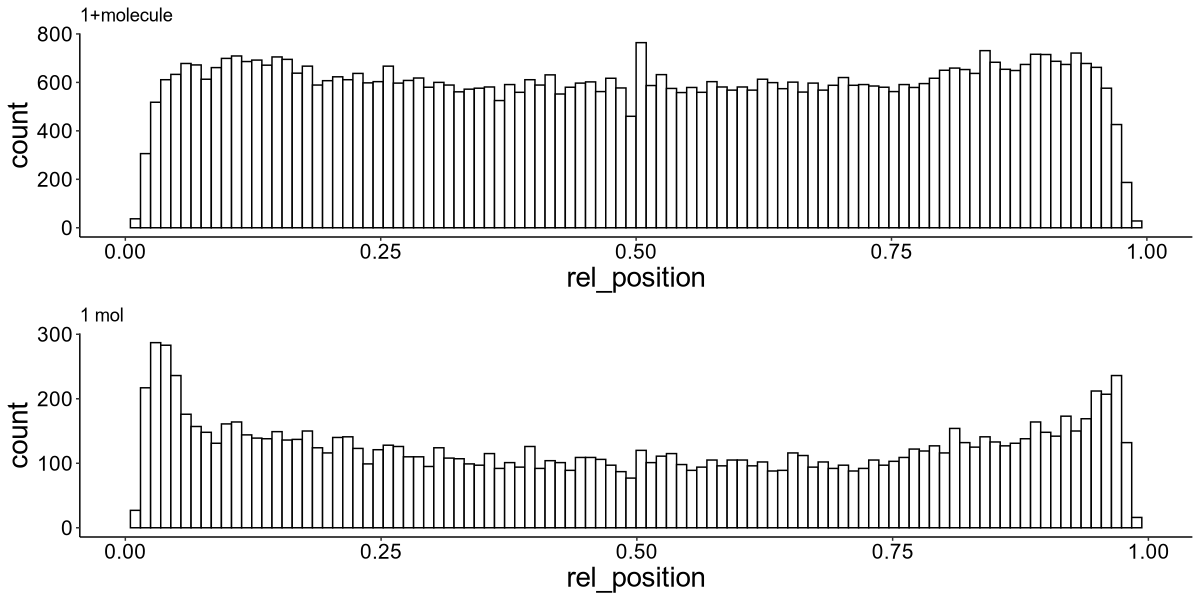

            unweight      weight_freq_all     weight_freq_1mol 
          0.05269964           0.03871845           0.04654703 
    weight_freq_2mol weight_freq_3molplus 
          0.06437970           0.03533152 
[1] "number of cells: 5276"
[1] "number of total mutations: 3093"
[1] "number of mutations per cell: 2"
[1] "number of cells connected: 17"
[1] "fraction of cells in component: 0.997346474601971"


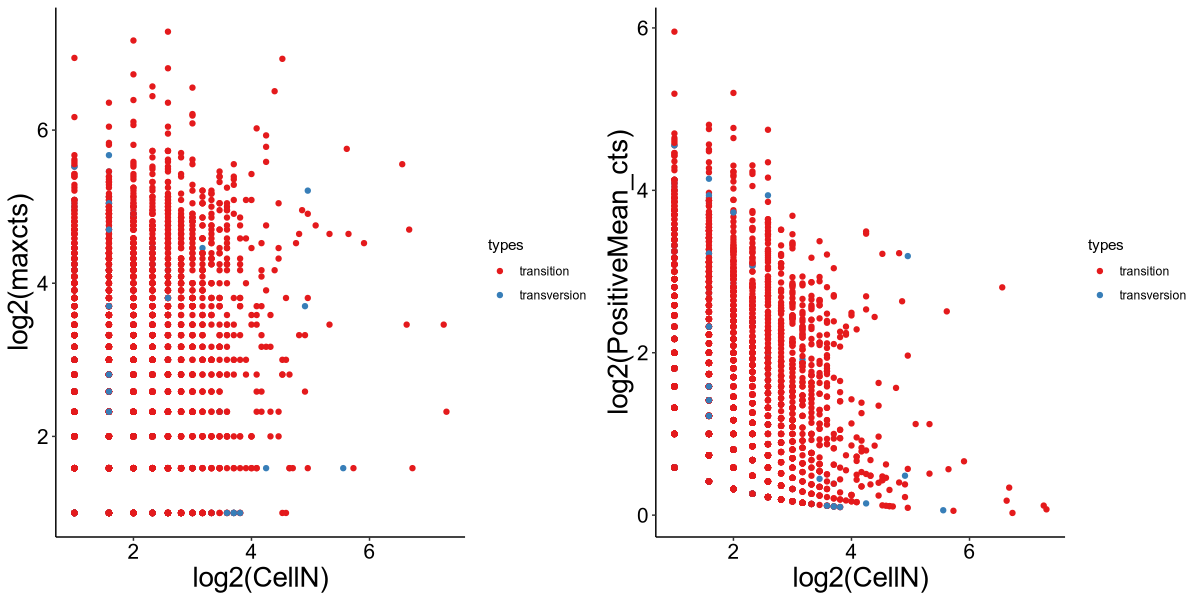

In [9]:
options(repr.plot.width = 12, repr.plot.height = 6, repr.plot.res = 100)
redeem_qc_report<-run_redeem_qc(example.redeem2, example.redeem2@HomoVariants)

## 24-08-13 add new function:  *redeemR.read.multiple.trim*

In [18]:
WD <- "/lab/solexa_weissman/cweng/Projects/MitoTracing_Velocity/SecondaryAnalysis/reproducibility_pub/data/redeemV_final/"
sample1 = "Young1.T1.BMMC.Consensus.final"
sample2 = "Young1.T1.HPC.Consensus.final" 
paths <- c(paste0(WD,sample1),paste0(WD,sample2))

In [ ]:
# Key function to read in GTSummary by combining multiple folders with trimming 5
VariantsGTSummary<- redeemR.read.multiple.trim(paths=paths,thr="S", names=c("BMMC","HPC"), suffix= c("1", "2"),edge_trim=5)
# Create redeemR object with binomial cleaning (replace maxcount cutoff)
redeemR<-Create_redeemR_model(VariantsGTSummary)
# Clean the redeem objecy with binomial cleaning FDR 0.05
redeemR<- clean_redeem(redeemR,fdr = 0.05)
# Clean the redeem object by removing a vector of mutations
redeemR<-clean_redeem_removehot(redeemR)

## 24-8-13  add variant nucleotide changes